# **Data Cleaning**

In [1]:
import pandas as pd

In [ ]:
df=pd.read_csv('hotel_booking.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,1/7/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,1/7/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2/7/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2/7/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,3/7/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
!pip install faker

In [ ]:
from faker import Faker

In [ ]:
fake = Faker()

# Generate fake departments data
departments_data = []
for _ in range(10):
    departments_data.append({
        'department_id': fake.unique.random_number(digits=5),
        'department_name': fake.company_suffix(),
        'manager_id': fake.unique.random_number(digits=5)
    })

# Convert to DataFrame
departments_df = pd.DataFrame(departments_data)

# Generate fake employees data
employees_data = []
for _ in range(50):
    employees_data.append({
        'employee_id': fake.unique.random_number(digits=5),
        'first_name': fake.first_name(),
        'last_name': fake.last_name(),
        'email': fake.email(),
        'phone_number': fake.phone_number(),
        'hire_date': fake.date_this_decade(),
        'job_id': fake.job(),
        'salary': round(fake.random_number(digits=5, fix_len=True) / 10, 2),
        'manager_id': fake.random_element(elements=[None] + list(departments_df['manager_id'])),
        'department_id': fake.random_element(elements=departments_df['department_id'].tolist())
    })

# Convert to DataFrame
employees_df = pd.DataFrame(employees_data)

In [ ]:
# Display the data
print("Departments Data:")
print(departments_df.head())

print("\nEmployees Data:")
print(employees_df.head())

Departments Data:
   department_id department_name  manager_id
0          84113           Group       69735
1          90463           Group       64085
2          98760             LLC        9024
3          37540             PLC       51161
4          12816             Ltd       82086

Employees Data:
   employee_id first_name last_name                      email  \
0        47502     Brenda     Baker  maureencoffey@example.com   
1        90413      David   Michael     hendrixamy@example.net   
2        95377       John   Ferrell     veronica69@example.org   
3         7148    Kenneth    Horton  natalielozano@example.net   
4         3728       Dawn    Murphy      gregriggs@example.net   

        phone_number   hire_date                              job_id  salary  \
0  740-830-1565x6586  2021-06-28  Teacher, special educational needs  2867.0   
1      (620)951-8382  2020-09-25  Government social research officer  1000.6   
2         2089779771  2022-10-02                   Transpo

In [ ]:
# Save the data to CSV files
departments_df.to_csv('departments_data.csv', index=False)
employees_df.to_csv('employees_data.csv', index=False)

# Handle Missing Values:

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,1/7/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,1/7/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2/7/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2/7/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,3/7/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for numrics
df.fillna(df.median(numeric_only=True), inplace=True)

# Drop rows with missing values
df.dropna(axis=0, inplace=True)

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                             1
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                              96
company                           988
days_in_waiting_list                0
customer_typ

In [ ]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           999 non-null    object 
 1   is_canceled                     999 non-null    int64  
 2   lead_time                       999 non-null    int64  
 3   arrival_date_year               999 non-null    int64  
 4   arrival_date_month              999 non-null    object 
 5   arrival_date_week_number        999 non-null    int64  
 6   arrival_date_day_of_month       999 non-null    int64  
 7   stays_in_weekend_nights         999 non-null    int64  
 8   stays_in_week_nights            999 non-null    int64  
 9   adults                          999 non-null    int64  
 10  children                        999 non-null    int64  
 11  babies                          999 non-null    int64  
 12  meal                            999 non-n

# Handling duplicates

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           999 non-null    object 
 1   is_canceled                     999 non-null    int64  
 2   lead_time                       999 non-null    int64  
 3   arrival_date_year               999 non-null    int64  
 4   arrival_date_month              999 non-null    object 
 5   arrival_date_week_number        999 non-null    int64  
 6   arrival_date_day_of_month       999 non-null    int64  
 7   stays_in_weekend_nights         999 non-null    int64  
 8   stays_in_week_nights            999 non-null    int64  
 9   adults                          999 non-null    int64  
 10  children                        999 non-null    int64  
 11  babies                          999 non-null    int64  
 12  meal                            999 non-n

# **Feature Engineering**

In [ ]:
df['total_stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stay_duration
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,0,Check-Out,1/7/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,0,Check-Out,1/7/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,75.0,0,0,Check-Out,2/7/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,75.0,0,0,Check-Out,2/7/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.0,0,1,Check-Out,3/7/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


In [ ]:
 # Rename 'phone-number' column to 'phone_number' for consistency
df.rename(columns={'phone-number': 'phone_number'}, inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone_number,credit_card,total_stay_duration
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,0,Check-Out,1/7/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,0,Check-Out,1/7/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,75.0,0,0,Check-Out,2/7/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,75.0,0,0,Check-Out,2/7/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.0,0,1,Check-Out,3/7/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


In [ ]:
df.to_csv('hotels_bbooking_cleaned.csv', index=False)

# **Extra:**

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/hotel_Reviews.csv'
df = pd.read_csv(file_path)

# **Reviews data cleaning:**

In [4]:
print(df.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [5]:
print(df.isnull().sum())

Review    0
Liked     0
dtype: int64


In [6]:
df['Review'] = df['Review'].str.lower()  # Convert to lowercase
df['Review'] = df['Review'].str.replace('[^\w\s]', '')  # Remove punctuation
df['Review'] = df['Review'].str.replace('\d+', '')  # Remove numbers

In [7]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['Review']).toarray()

In [8]:
y = df['Liked']

# **Model:**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
def predict_sentiment(review):
    # Preprocess the review text
    review = review.lower()  # Convert to lowercase
    review = ''.join([c for c in review if c.isalnum() or c.isspace()])  # Remove punctuation and numbers
    review_tfidf = tfidf.transform([review]).toarray()  # Convert to TF-IDF

    # Predict sentiment using our trained model
    prediction = model.predict(review_tfidf)

    return prediction[0]  # Return 1 for positive, 0 for negative


# **Evaluate**

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        97
           1       0.88      0.73      0.80       103

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



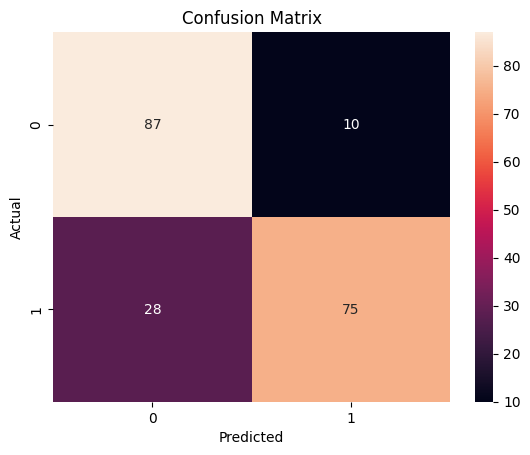

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Predicating:**

In [14]:
new_review = "The hotel was great, very clean and the staff was friendly!"
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {"Positive (1)" if sentiment == 1 else "Negative (0)"}')

The sentiment of the review is: Positive (1)


In [15]:
new_review2 = "The hotel was awful, very dirty and the staff was rude!"
sentiment = predict_sentiment(new_review2)
print(f'The sentiment of the review is: {"Positive (1)" if sentiment == 1 else "Negative (0)"}')

The sentiment of the review is: Negative (0)
